In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../") # Enables importing from parent directory
from fpl_draft_league import charts
from fpl_draft_league import utils
from fpl_draft_league import fpl_draft_league as fpl
import matplotlib.pyplot as plt
import pandas as pd
import getpass
import json

In [3]:
utils.get_json('lee.gower17@gmail.com')

Enter Password:  ·········


In [4]:
elements_df = utils.get_data('elements')
df = utils.get_team_players_agg_data()
df = pd.merge(df, elements_df, left_on='element', right_on='id')

def get_element_summary_data(email_address, elements):

    pwd = getpass.getpass('Enter Password: ')
    
    for element in elements:
        
        # Create a separate .json file for an element
        json_files = [f"../data/elements/{str(element)}.json"]
        
        # Write the api call
        apis = [f"https://draft.premierleague.com/api/element-summary/{str(element)}"]

        # Post credentials for authentication
        pwd = pwd
        session = requests.session()
        url = 'https://users.premierleague.com/accounts/login/'
        payload = {
         'password': pwd,
         'login': email_address,
         'redirect_uri': 'https://fantasy.premierleague.com/a/login',
         'app': 'plfpl-web'
        }
        session.post(url, data=payload)

        # Loop over the api(s), call them and capture the response(s)
        for file, i in zip(json_files, apis):
            r = session.get(i)
            jsonResponse = r.json()
            with open(file, 'w') as outfile:
                json.dump(jsonResponse, outfile)
                
elements_to_pull = df['element']

import requests
get_element_summary_data('lee.gower17@gmail.com', elements_to_pull)

Enter Password:  ·········


## Standings

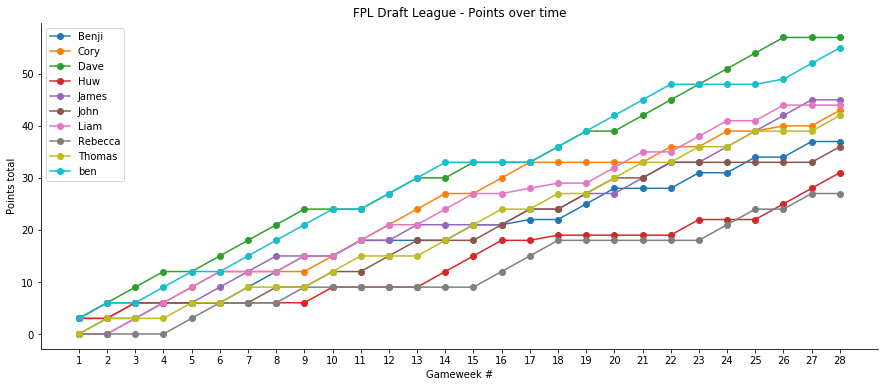

In [8]:
charts.chart_league_standings_history()

## Top 10 Players

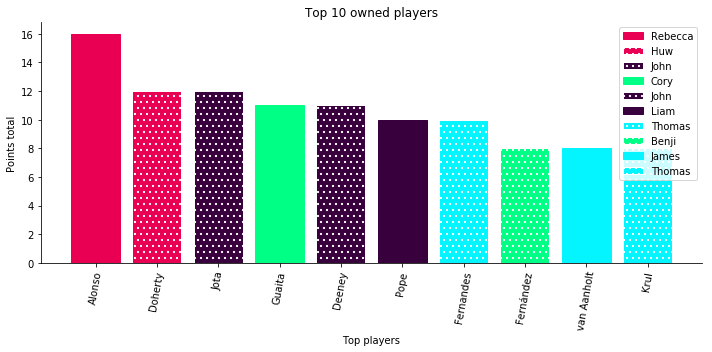

In [9]:
charts.chart_top_n_players(10)

## Streaks

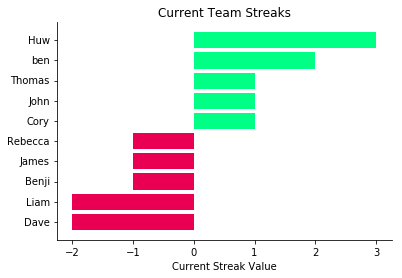

In [10]:
charts.chart_current_streaks()

Enter Password:  ·········


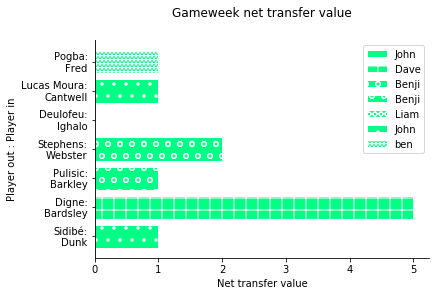

In [11]:
charts.chart_net_xfer_value()